In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator

In [2]:
import itertools
import random
import warnings
import numpy as np
import cv2
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint, EarlyStopping
from matplotlib import pyplot as plt

In [3]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [69]:
train_path = r'C:\Users\Pragashraj\Documents\Gesture and Sign language recognition for disabled people\data\Train_Alt'
test_path = r'C:\Users\Pragashraj\Documents\Gesture and Sign language recognition for disabled people\data\Test_Alt'

In [70]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(64,64), class_mode='categorical', batch_size=10,shuffle=True)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(64,64), class_mode='categorical', batch_size=10, shuffle=True)

imgs, labels = next(train_batches)

Found 30000 images belonging to 10 classes.
Found 10 images belonging to 10 classes.


In [71]:
#Plotting the images...
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(30,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

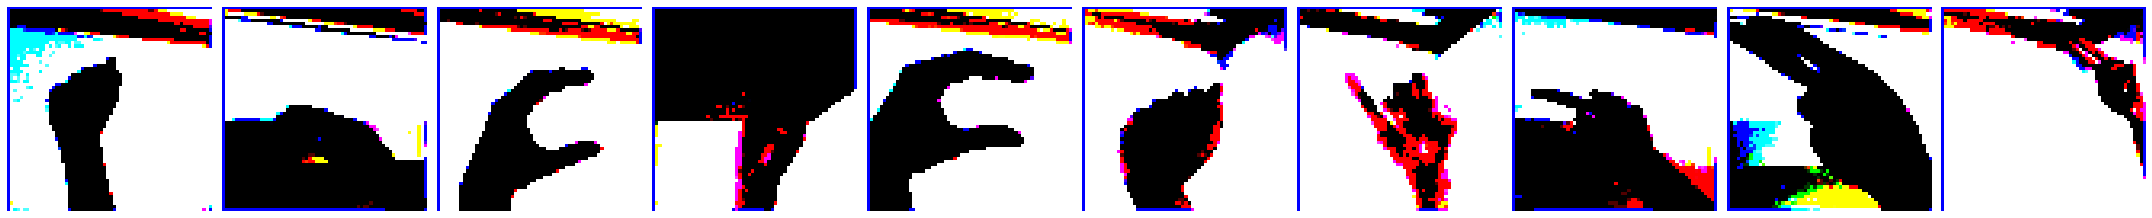

(10, 64, 64, 3)
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [72]:
plotImages(imgs)
print(imgs.shape)
print(labels)

In [73]:
model = Sequential()

In [74]:
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

In [75]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

In [76]:
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

In [77]:
model.add(Flatten())

In [78]:
model.add(Dense(64, activation = "relu"))
model.add(Dense(128, activation = "relu"))

#model.add(Dropout(0.2))
model.add(Dense(128, activation = "relu"))

#model.add(Dropout(0.3))
model.add(Dense(10, activation = "softmax"))

In [79]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 31, 31, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 6, 6, 128)       

In [80]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')

In [81]:
model.compile(optimizer=SGD(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0005)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')

In [82]:
history2 = model.fit(train_batches, epochs=10, callbacks=[reduce_lr, early_stop],  validation_data = test_batches)
imgs, labels = next(train_batches) # For getting next batch of imgs...

Epoch 1/10
3000/3000 [==============================] - 1046s 348ms/step - loss: 0.7919 - accuracy: 0.7136 - val_loss: 0.0394 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 2/10
3000/3000 [==============================] - 170s 57ms/step - loss: 0.1362 - accuracy: 0.9543 - val_loss: 0.0011 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 3/10
3000/3000 [==============================] - 175s 58ms/step - loss: 0.0465 - accuracy: 0.9854 - val_loss: 0.0098 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 4/10
3000/3000 [==============================] - 176s 59ms/step - loss: 0.0091 - accuracy: 0.9989 - val_loss: 3.1058e-04 - val_accuracy: 1.0000 - lr: 5.0000e-04
Epoch 5/10
3000/3000 [==============================] - 172s 57ms/step - loss: 0.0043 - accuracy: 0.9999 - val_loss: 3.5891e-04 - val_accuracy: 1.0000 - lr: 5.0000e-04
Epoch 6/10
3000/3000 [==============================] - 175s 58ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 2.2751e-04 - val_accuracy: 1.0000 - lr: 5.0000e-04
Epoch 7/10
300

In [83]:
imgs, labels = next(test_batches) # For getting next batch of imgs...
scores = model.evaluate(imgs, labels, verbose=0)
print(f'{model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

loss of 4.528096178546548e-05; accuracy of 100.0%


In [84]:
#model.save('model.h5')
model.save('model/Gesture_Model.h5')

print(history2.history)

{'loss': [0.7919358611106873, 0.1362115889787674, 0.04646237939596176, 0.009098870679736137, 0.0042600007727742195, 0.002789500169456005, 0.002047083107754588, 0.001526111620478332, 0.0012270911829546094, 0.0010306262411177158], 'accuracy': [0.7136333584785461, 0.9543333053588867, 0.9854000210762024, 0.9988999962806702, 0.9998666644096375, 0.9999666810035706, 1.0, 1.0, 1.0, 1.0], 'val_loss': [0.03935139626264572, 0.0011209568474441767, 0.009777773171663284, 0.00031058158492669463, 0.00035890896106138825, 0.00022750887728761882, 0.0002042271662503481, 0.00010096960613736883, 0.00011132739018648863, 4.528096178546548e-05], 'val_accuracy': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'lr': [0.001, 0.001, 0.001, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005]}


In [85]:
imgs, labels = next(test_batches)

In [86]:
model = keras.models.load_model(r"model/Gesture_Model.h5")

In [87]:
scores = model.evaluate(imgs, labels, verbose=0)
print(f'{model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

loss of 4.528096178546548e-05; accuracy of 100.0%


In [88]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 31, 31, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 6, 6, 128)       

In [89]:
scores #[loss, accuracy] on test data...
model.metrics_names

['loss', 'accuracy']

In [90]:
word_dict = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H', 8:'I', 9:'J'}

In [91]:
predictions = model.predict(imgs, verbose=0)
print("predictions on a small set of test data--")
print("")
for ind, i in enumerate(predictions):
    print(word_dict[np.argmax(i)], end='   ')

predictions on a small set of test data--

B   G   J   C   E   D   A   F   H   I   

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

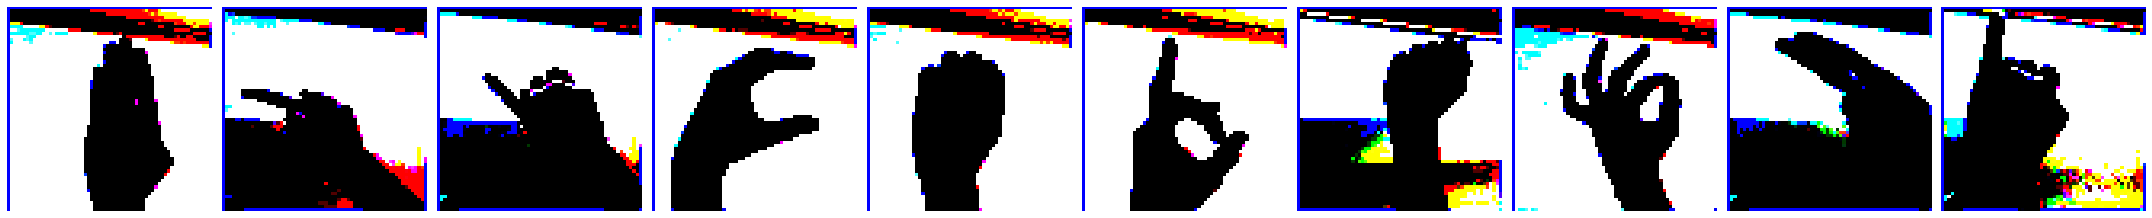

Actual labels
B   G   J   C   E   D   A   F   H   I   (10, 64, 64, 3)


In [92]:
plotImages(imgs)
print('Actual labels')
for i in labels:
    print(word_dict[np.argmax(i)], end='   ')

print(imgs.shape)

In [94]:
history2.history

{'loss': [0.7919358611106873,
  0.1362115889787674,
  0.04646237939596176,
  0.009098870679736137,
  0.0042600007727742195,
  0.002789500169456005,
  0.002047083107754588,
  0.001526111620478332,
  0.0012270911829546094,
  0.0010306262411177158],
 'accuracy': [0.7136333584785461,
  0.9543333053588867,
  0.9854000210762024,
  0.9988999962806702,
  0.9998666644096375,
  0.9999666810035706,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.03935139626264572,
  0.0011209568474441767,
  0.009777773171663284,
  0.00031058158492669463,
  0.00035890896106138825,
  0.00022750887728761882,
  0.0002042271662503481,
  0.00010096960613736883,
  0.00011132739018648863,
  4.528096178546548e-05],
 'val_accuracy': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'lr': [0.001,
  0.001,
  0.001,
  0.0005,
  0.0005,
  0.0005,
  0.0005,
  0.0005,
  0.0005,
  0.0005]}